In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#types = {'country':'int64'}
types = {'auction_type_id':'category','country':'int64','device_id':'int64','platform':'category','ref_type':'category','source_id':'category'}
df_tp = pd.read_csv('datos_tp/auctions.csv', dtype = types)

In [4]:
df_tp['date'] = pd.to_datetime(df_tp['date'], format = '%Y-%m-%d %H:%M:%S')
df_tp.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
#del(df_tp['auction_type_id'])
df_tp.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 7 columns):
auction_type_id    category
country            int64
date               datetime64[ns]
device_id          int64
platform           category
ref_type_id        int64
source_id          category
dtypes: category(3), datetime64[ns](1), int64(3)
memory usage: 653.3 MB


In [6]:
df_tp['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [7]:
df_tp['suma'] = 1
df_tp['hour'] = df_tp['date'].apply(lambda x: x.hour)

dev_group = df_tp.groupby(['device_id']).agg({'suma':'sum'})
dev_group

,suma
device_id,
113858820194433,48
148049712234927,4
163367509015039,36
250378692954397,14
356084629798952,4
400199180093841,21
536121741587392,4
542666285694718,1143
557498597278769,80


In [8]:
dev_group.sort_values(by='suma',ascending=False).head()

,suma
device_id,
633139769114048761,27762
7202276635029175071,23055
7298861376107043945,18188
6302840482782120473,16400
5376802567578262905,16367


In [9]:
top5dev = df_tp[['device_id','date','suma']]
top5dev = top5dev.loc[((df_tp['device_id']==633139769114048761)| \
                   (df_tp['device_id']==7202276635029175071) | \
                   (df_tp['device_id']==7298861376107043945) | \
                   (df_tp['device_id']==6302840482782120473) | \
                   (df_tp['device_id']==5376802567578262905) )]
top5dev.head()

,device_id,date,suma
12655,7298861376107043945,2019-03-12 03:02:37.264242,1
12857,7298861376107043945,2019-03-12 03:40:56.976592,1
12890,7298861376107043945,2019-03-12 03:41:40.257843,1
12940,7298861376107043945,2019-03-12 03:43:01.529164,1
13109,633139769114048761,2019-03-12 03:49:58.483260,1


In [10]:
top5dev.date.max()

Timestamp('2019-03-13 23:59:15.023111')

In [11]:
top5dev.date.min()

Timestamp('2019-03-05 00:53:29.247891')

In [12]:
top5dev['day'] = top5dev['date'].apply(lambda x: x.day)
top5dev.head()

,device_id,date,suma,day
12655,7298861376107043945,2019-03-12 03:02:37.264242,1,12
12857,7298861376107043945,2019-03-12 03:40:56.976592,1,12
12890,7298861376107043945,2019-03-12 03:41:40.257843,1,12
12940,7298861376107043945,2019-03-12 03:43:01.529164,1,12
13109,633139769114048761,2019-03-12 03:49:58.483260,1,12


In [13]:
#top5dev.set_index('device_id',inplace=True)

dev_group = top5dev.groupby(['device_id','day']).agg({'suma':'sum'})
dev_group.reset_index(inplace=True)
dev_group

,device_id,day,suma
0,633139769114048761,5,2255
1,633139769114048761,6,224
2,633139769114048761,7,1877
3,633139769114048761,8,1865
4,633139769114048761,9,2054
5,633139769114048761,10,5777
6,633139769114048761,11,4829
7,633139769114048761,12,4625
8,633139769114048761,13,4256
9,5376802567578262905,5,122


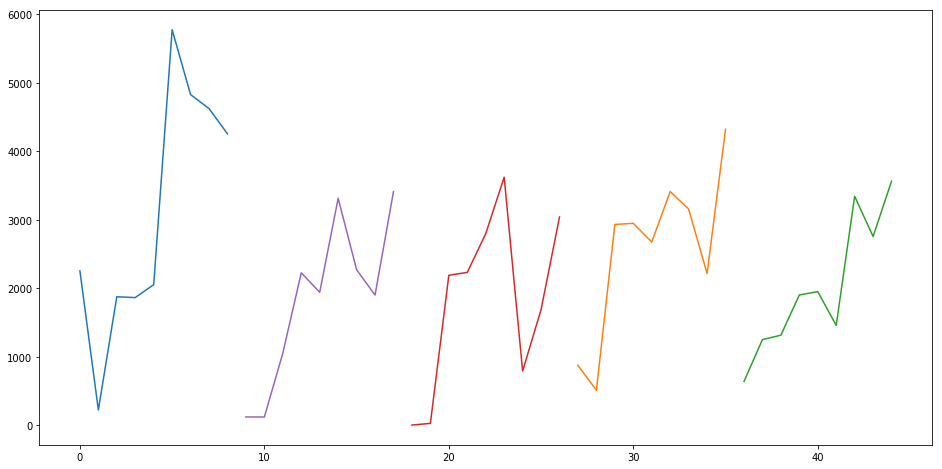

In [17]:
dev_group.loc[(dev_group['device_id'] == 633139769114048761),'suma'].plot(figsize=(16,8));
dev_group.loc[(dev_group['device_id'] == 7202276635029175071),'suma'].plot(figsize=(16,8));
dev_group.loc[(dev_group['device_id'] == 7298861376107043945),'suma'].plot(figsize=(16,8));
dev_group.loc[(dev_group['device_id'] == 6302840482782120473),'suma'].plot(figsize=(16,8));
dev_group.loc[(dev_group['device_id'] == 5376802567578262905),'suma'].plot(figsize=(16,8));


In [15]:
.plot(figsize=(14,4));

SyntaxError: invalid syntax (<ipython-input-15-2dde0ecc65f2>, line 1)